<a href="https://colab.research.google.com/github/davidOplatka/projects/blob/main/Diabetes_Classification_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Union Curriculum EDA Mini Project

The purpose of this project is to practice exportatory data analysis (EDA) and basic machine learning models with a data set. You will see some instructions throughout this notebook, which were provided by Lukas Hager and Hairan Liang. I produced all other comments and code in this notebook.

In [73]:
# Imports
from google.colab import files
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data_url = "https://raw.githubusercontent.com/davidOplatka/datasets/main/diabetes.csv"
df = pd.read_csv(data_url)
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


---
# Exploratory Data Analysis and Data Visualization

Start by filling in the following information!

* **Dataset name**:  Healthcare Diabetes Dataset

* **Link to dataset**: https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes/data

* **Brief dataset description**:  This data set provides a variety of health information that could be useful for determining whether or not someone has diabetes. Some factors could include glucose concentration, blood pressure, and body mass index (BMI). The last column, Outcome, indicates whether or not a person has diabetes (A 1 indicates the person has diabetes and a 0 indicates that they do not).

Each time you work on your EDA, you may have to reload your dataset by running the previous code cell in "Choosing your data."

---
# Data Preparation

**DataFrame Information**

*    Find the number of rows and columns you're working with, using **attribute** `shape` of your DataFrame.
*    Learn the types of data each column has, using **attribute** `dtypes` of your DataFrame.
*    Try out the **method** `your_dataframe.info(verbose = True)`.
*    Be familiar with the meaning of each column, and use the **method** [`rename`](https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas) them to make them more clear if possible.
*    Check out the first `n` rows of your DataFrame with the **method** `your_dataframe.head(n)`.

In [75]:
df.shape

(2768, 10)

In [76]:
# All the data we are working with are numbers (quantitative data), except for the last column (Outcome), which is a binary classifier.
df.dtypes

Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [77]:
# There are no null values in the data set and we have all of the desired data types for each column!!
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [78]:
df.columns = ['Id', 'NumPregnancies', 'GlucoseConcentration', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'FamilyHistoryScore', 'Age', 'Diabetes']

In [79]:
df.head(10)

,Id,NumPregnancies,GlucoseConcentration,BloodPressure,SkinThickness,Insulin,BMI,FamilyHistoryScore,Age,Diabetes
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


Numerical and Categorical Data

*    Figure out which columns of your DataFrame are categorical versus numerical values.
*    Find the unique values each categorical variable can take on using the `unique` **method** on a Series column.

As we saw from the df.info attribute, all of our columns are numeric, except for the last one, which is categorical. This last column is already split into 0s and 1s depending on the person's diabetes status, so we don't need to do any further cleaning in this aspect.


In [80]:
# This column can only have the values 0 or 1, indicating whether or not a person has diabetes
df['Diabetes'].unique()

array([1, 0])

Finding Missing Values
*    Find the [number of missing values per column](https://stackoverflow.com/questions/22257527/how-do-i-get-a-summary-count-of-missing-nan-data-by-column-in-pandas) in your DataFrame.
    * Try to report the percentage of missing values in a column.
*    Consider dropping columns with too many missing values (perhaps 40+%)
*    Consider [dropping rows](https://www.geeksforgeeks.org/drop-rows-from-pandas-dataframe-with-missing-values-or-nan-in-columns/) with too many missing values.

Remove Missing Values ([Tutorial](https://machinelearningmastery.com/handle-missing-data-python/), skip to Section 5)
*    Consider dropping rows with missing values if you have *enough* data (retaining at least 70% of data and having at least 100 observations).
*    Impute missing values with the `fillna` **method** with reasonable values.

In [81]:
df.isna().sum()

Id                      0
NumPregnancies          0
GlucoseConcentration    0
BloodPressure           0
SkinThickness           0
Insulin                 0
BMI                     0
FamilyHistoryScore      0
Age                     0
Diabetes                0
dtype: int64

As you can see, we have no missing values in our data set. We will, however, drop the 'Id' column because it is just a unique identifier and does not help us gain any insight into whether or not a person has diabetes. We also want to see if there are any duplicate rows in our data set

In [82]:
df.drop(columns = ['Id'], inplace = True)
df.head()

,NumPregnancies,GlucoseConcentration,BloodPressure,SkinThickness,Insulin,BMI,FamilyHistoryScore,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [83]:
sum(df.duplicated())

1990

In [84]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2763     True
2764     True
2765     True
2766     True
2767     True
Length: 2768, dtype: bool

In [85]:
df.drop_duplicates()

,NumPregnancies,GlucoseConcentration,BloodPressure,SkinThickness,Insulin,BMI,FamilyHistoryScore,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2332,1,100,62,0,0,64.4,0.152,36,0
2333,0,163,40,23,64,40.7,0.322,33,0
2334,6,139,84,37,0,50.7,0.320,50,1
2335,2,167,44,30,140,52.7,0.452,28,0


There are 1990 duplicate rows in our dataset, which is very concerning since the total number of rows initially is 2,768!! This only leaves us with only 778 unique rows in our dataset. It makes sense to drop the duplicates in this case because it is unlikely that two different people have the exact same numbers for all of the variables in this data set. Additionally, we can see from the df.duplicated() method that all of the first few rows are unique while all of the last rows are duplicates. Thus, this data set was likely made larger by copying the rows of the data set several times. We should not include people's information more than once, so we are going to drop all duplicate rows from the data set, giving us a new number of rows.

In [86]:
df.drop_duplicates(inplace = True, ignore_index = True)
print(df.shape)
print(df.info())

(778, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NumPregnancies        778 non-null    int64  
 1   GlucoseConcentration  778 non-null    int64  
 2   BloodPressure         778 non-null    int64  
 3   SkinThickness         778 non-null    int64  
 4   Insulin               778 non-null    int64  
 5   BMI                   778 non-null    float64
 6   FamilyHistoryScore    778 non-null    float64
 7   Age                   778 non-null    int64  
 8   Diabetes              778 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.8 KB
None


In [87]:
# Final cleaned data set
df.head()

,NumPregnancies,GlucoseConcentration,BloodPressure,SkinThickness,Insulin,BMI,FamilyHistoryScore,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---
# Data Exploration

Recall that this is the *non-graphical* part of this step of the process.

Summary Statistics ([Tutorial](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html))
*    Can quickly find various statistics on the whole dataframe using the `describe` **method**.
*    Can look into specific categorical variables using the `groupby` and `agg` **methods**.

In [88]:
df.describe()

,NumPregnancies,GlucoseConcentration,BloodPressure,SkinThickness,Insulin,BMI,FamilyHistoryScore,Age,Diabetes
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,3.821337,121.199229,68.975578,20.763496,80.388175,32.185476,0.471861,33.347044,0.349614
std,3.360794,31.990831,19.471675,16.329714,115.113501,8.215687,0.330180,11.789024,0.477155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.325000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.250000,0.374500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.775000,0.626750,41.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


Unfortunately, we only have one categorical variable, so there is not much we can do in terms of EDA with groupby. It is worth at least taking a look if there is some difference in the various statistics between people who do and do not have diabetes.

In [89]:
for column in df.columns[0:8]:
  print(f"Average {column} Grouped by Diabetes Status:\n{df.groupby('Diabetes')[column].mean()}\n")

Average NumPregnancies Grouped by Diabetes Status:
Diabetes
0    3.278656
1    4.830882
Name: NumPregnancies, dtype: float64

Average GlucoseConcentration Grouped by Diabetes Status:
Diabetes
0    110.436759
1    141.220588
Name: GlucoseConcentration, dtype: float64

Average BloodPressure Grouped by Diabetes Status:
Diabetes
0    67.920949
1    70.937500
Name: BloodPressure, dtype: float64

Average SkinThickness Grouped by Diabetes Status:
Diabetes
0    19.83004
1    22.50000
Name: SkinThickness, dtype: float64

Average Insulin Grouped by Diabetes Status:
Diabetes
0     69.673913
1    100.319853
Name: Insulin, dtype: float64

Average BMI Grouped by Diabetes Status:
Diabetes
0    30.591700
1    35.150368
Name: BMI, dtype: float64

Average FamilyHistoryScore Grouped by Diabetes Status:
Diabetes
0    0.430211
1    0.549342
Name: FamilyHistoryScore, dtype: float64

Average Age Grouped by Diabetes Status:
Diabetes
0    31.237154
1    37.272059
Name: Age, dtype: float64



We can see some differences in the average glucose concentration, insulin, BMI, family history, and age among patients who do and do not have diabetes. This may indicate that these are good predictor variables to use for a classification model for predicting whether or not a person has or will have diabetes.

---
# Data Visualization

Univariate Analysis ([Plotting Tutorial](https://www.kaggle.com/residentmario/univariate-plotting-with-pandas))
*    Plot the distribution of numerical variables with [histograms](https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-histograms) or [density plots](https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation).
*    Look for outliers of numerical variables using [violin plots](https://seaborn.pydata.org/generated/seaborn.violinplot.html) or [box plots](https://seaborn.pydata.org/generated/seaborn.boxplot.html).
*    Understand the numerical distribution of categorical variables by calling the `value_counts` **method** on a single Series column.
*    Plot the distribution of categorical variables with [bar charts](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot) (no pie charts please, we hate pie charts).


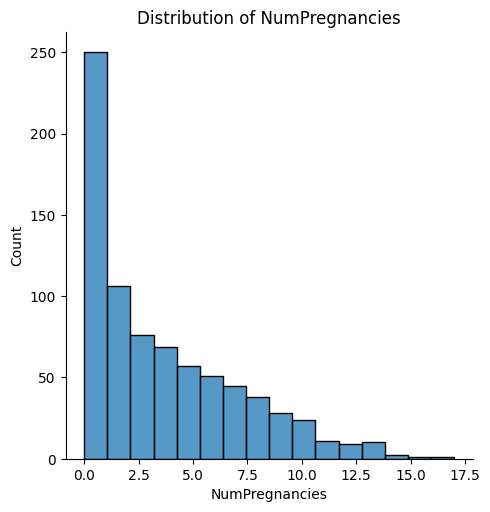

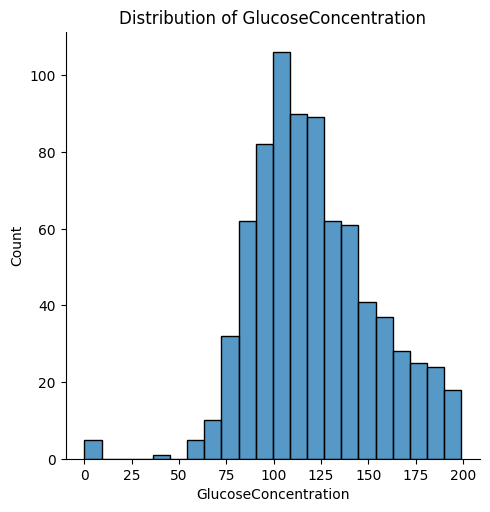

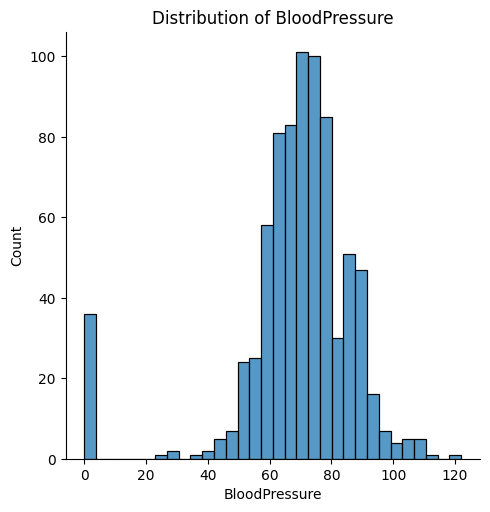

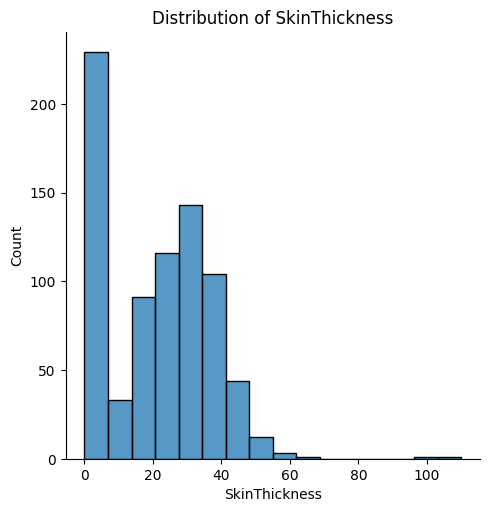

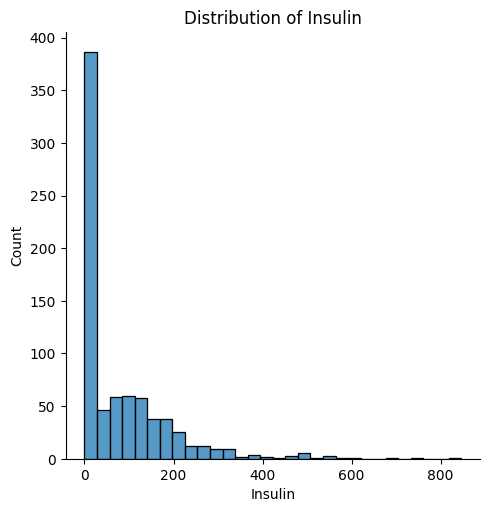

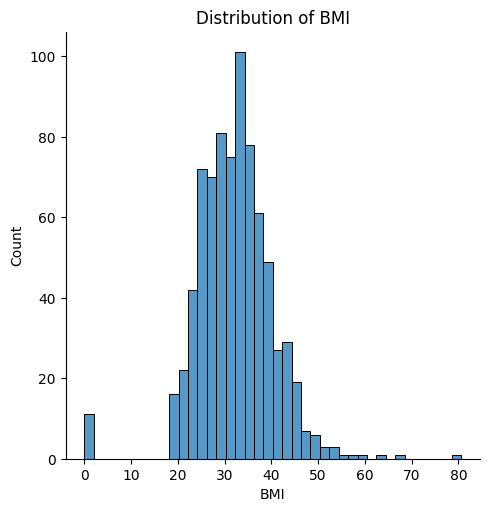

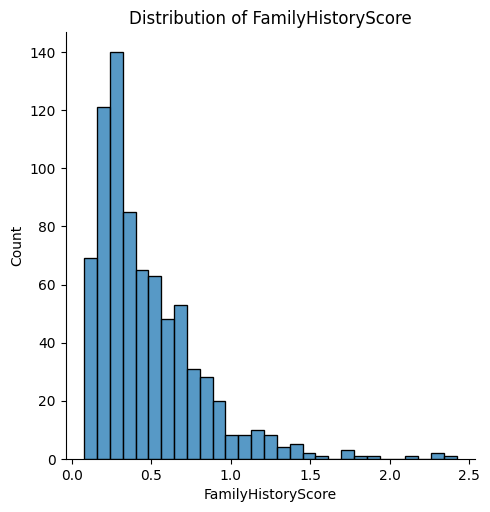

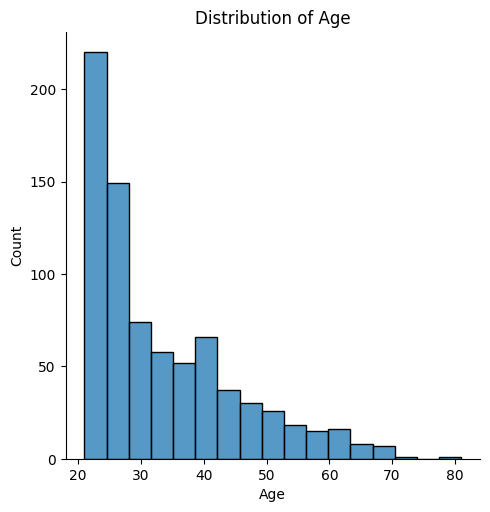

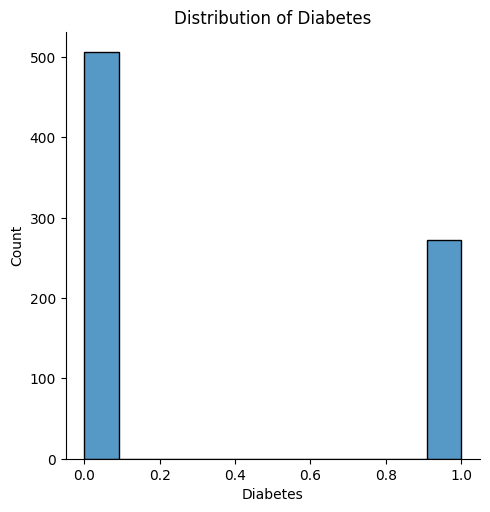

In [90]:
for column in df.columns:
  sns.displot(df, x = column)
  plt.title("Distribution of " + column)
  plt.show()

One thing we notice in many of these plots is a large number of 0s in certain columns that might not make sense in context. For example, there are nearly 40 people with a blood pressure of 0 mm Hg. Low blood pressures occur around 60 mm Hg, so you would be dead if your blood pressure was 0 mm Hg. This leads me to believe that these 0 values were replacements for NA values. If I am to conduct, further analyses, I must first deal with these missing values, using the strategies recommended above.

## Data Cleaning Part 2: Dealing with "Missing" Values

We are going to try to drop or replace 0s in columns where it does not make sense. It makes sense for people to have 0 pregnancies and 0 family history of diabetes. Among all other predictor variables (all variables except Outcome), it does not make sense to have a value of 0 for that variable. Thus, we should look at the proportion of 0s in each of these columns and try to deal with each of them.

In [91]:
df[df['GlucoseConcentration'] == 0]

,NumPregnancies,GlucoseConcentration,BloodPressure,SkinThickness,Insulin,BMI,FamilyHistoryScore,Age,Diabetes
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


There are only 5 people who have a Glucose concentration of 0, and the insulin distribution is roughly bell shaped with a slight skew to the right. Thus, it makes sense to impute these rows with the median glucose concentration.

In [92]:
df.loc[df['GlucoseConcentration'] == 0, 'GlucoseConcentration'] = df.loc[df['GlucoseConcentration'] > 0, 'GlucoseConcentration'].median()

In [93]:
len(df[df['BloodPressure'] == 0]) / df.shape[0] * 100

4.627249357326478

Only 4% of the data set has 0 blood pressures, so we should also be able to impute these values with the median blood pressure.

In [94]:
df.loc[df['BloodPressure'] == 0, 'BloodPressure'] = df.loc[df['BloodPressure'] > 0, 'BloodPressure'].median()

In [95]:
len(df[df['SkinThickness'] == 0]) / df.shape[0] * 100

29.43444730077121

Nearly 30% of the Skin Thickness column has a value of 0, which is a very high proportion to simply impute. Thus, we will leave the column unchanged for now and likely igore it for most of our analysis. We can consider dropping this column later as well if we deem it irrelevant.

In [96]:
len(df[df['Insulin'] == 0]) / df.shape[0] * 100

48.45758354755784

Almost half of the insulin column has a value of 0, which is very high. This column will not be able to give us meaningful information if we impute values, so we will simply drop it.

In [97]:
df.drop(columns = 'Insulin', inplace = True)

In [98]:
len(df[df['BMI'] == 0]) / df.shape[0] * 100

1.4138817480719794

We will also impute BMI missing values with the median because only about 1.4% of the values are 0.

In [99]:
df.loc[df['BMI'] == 0, 'BMI'] = df.loc[df['BMI'] > 0, 'BMI'].median()

In [100]:
df.head()

,NumPregnancies,GlucoseConcentration,BloodPressure,SkinThickness,BMI,FamilyHistoryScore,Age,Diabetes
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1


### Data Visualization (Continued)

We can now try again to more accurately visualize our data and try to extract some information. Let's look at the distributions of each variable again now that we have corrected the missing values.

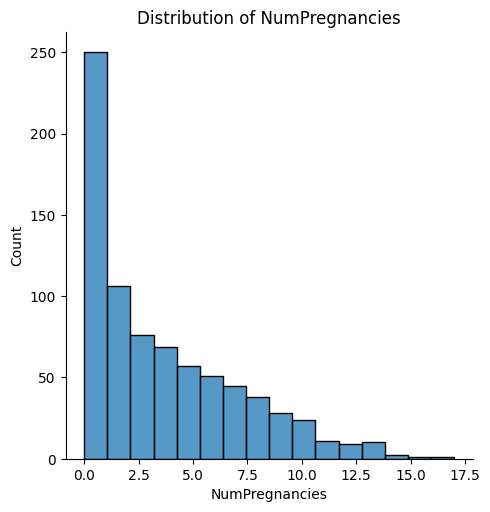

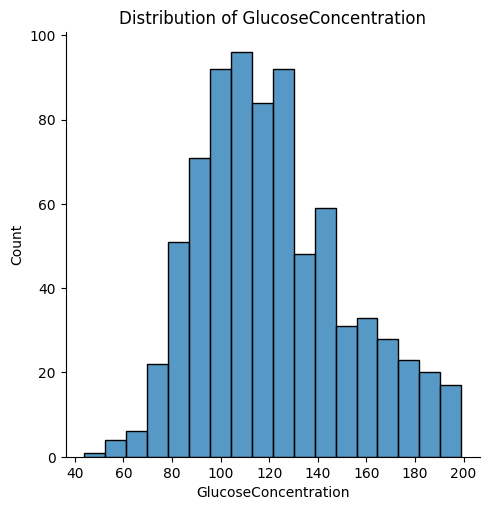

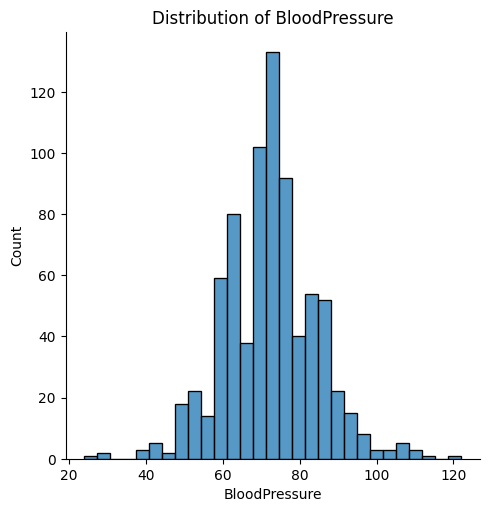

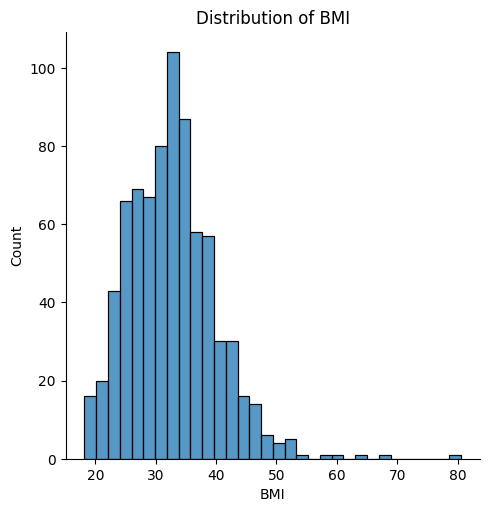

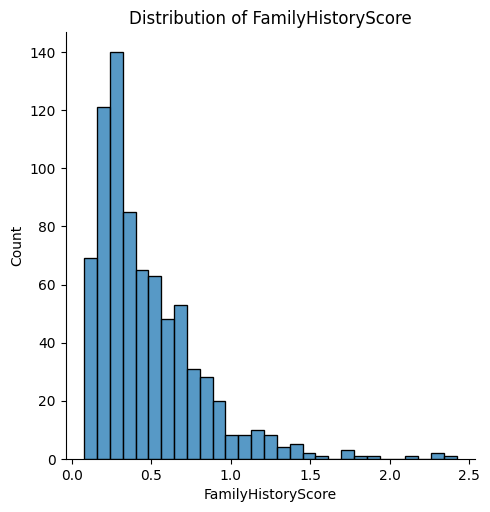

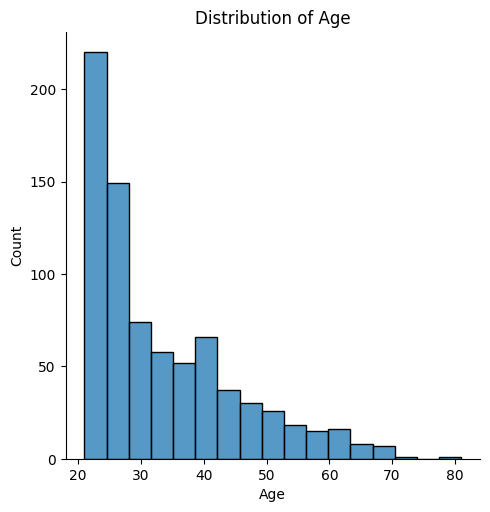

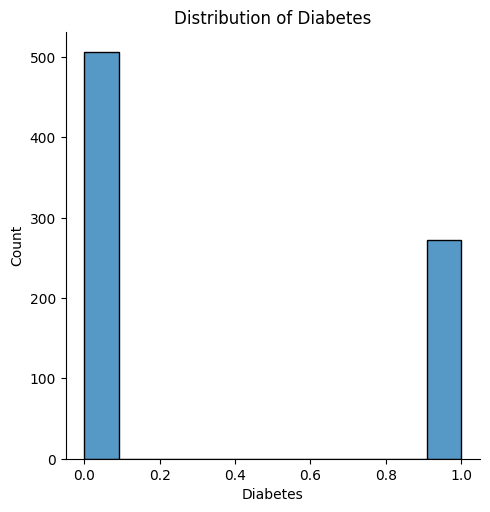

In [101]:
df2 = df.drop(columns = 'SkinThickness') # We will "drop" SkinThickness for now because it has so many invalid values

for column in df2.columns:
  sns.displot(df2, x = column)
  plt.title("Distribution of " + column)
  plt.show()

We can see that blood pressure and BMI are roughly symmetric distributions while glucose concentration, number of pregnancies, age, and family history are right skewed distributions. Lastly, the majority of people in our dataset do not have diabetes (Approximately a 5:3 ratio of people without to people with diabetes).

<Axes: >

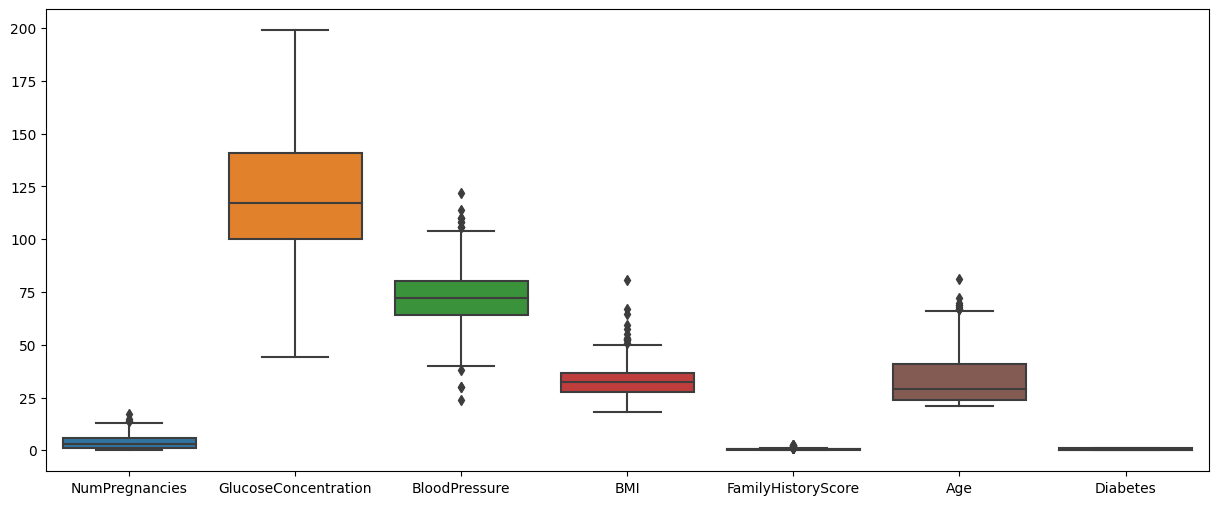

In [102]:
plt.figure(figsize = (15, 6))
sns.boxplot(df2)

There are very few outliers among the data, with the most outliers coming from the BMI and Blood Pressure variables.

In [103]:
df2['Diabetes'].value_counts()

0    506
1    272
Name: Diabetes, dtype: int64

Again, we have significantly more people in our data set that do not have diabetes than the number of people that have diabetes. This is important for deciding which type of classification model we choose when trying to predict whether or not someone has diabetes given information about the other factors/variables.

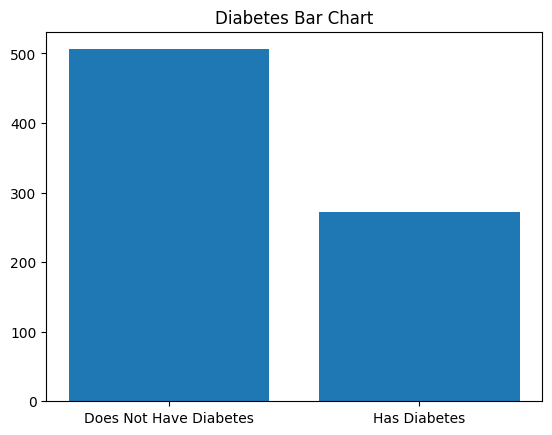

In [104]:
plt.bar(x = ['Does Not Have Diabetes', 'Has Diabetes'], height = [len(df[df['Diabetes'] == 0]), len(df[df['Diabetes'] == 1])])
plt.title("Diabetes Bar Chart")
plt.xlabel = "Diabetes Status"
plt.ylabel = "Number of Patients"
plt.show()

Bivariate Analysis ([Plot Ideas](https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas))
*   Understand the relationships between variables with...
    * [Scatter Plots](https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots)
    * [Line Plots](https://seaborn.pydata.org/tutorial/relational.html#emphasizing-continuity-with-line-plots)
    * [Regression Plots](https://seaborn.pydata.org/tutorial/regression.html)
    * [Heat Maps](https://seaborn.pydata.org/tutorial/distributions.html#visualizing-bivariate-distributions)
    * and [MORE](https://www.data-to-viz.com/#explore)....



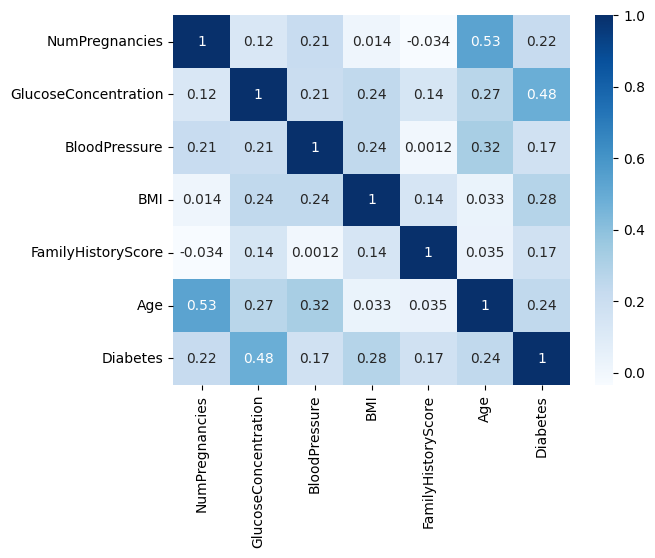

In [105]:
sns.heatmap(df2.corr(), annot = True, cmap = 'Blues')
plt.show()

There is very little correlation between any of the variables in our data set. The highest correlation (age vs. number of pregnancies) is sort of obvious just by the nature of human reproduction-so it doesn't give us much insight-and the rest of the correlations are two low to have any indications of relationships between two variables 😞

## Classification Model: K Nearest Neighbors

Finally, let's try to create a classification model that helps us predict whether or not someone has diabetes based on the other variables in the data set. We will first use a simple KNN model to predict whether or not someone has diabetes.

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [107]:
# Normalize the data
scaler = StandardScaler()
X = df2.drop(columns = 'Diabetes')
X = scaler.fit_transform(X)
X

array([[ 0.6486755 ,  0.85544469, -0.02526561,  0.13193024,  0.47016374,
         1.41349017],
       [-0.8400252 , -1.21347695, -0.51873783, -0.83365515, -0.36628193,
        -0.19921527],
       [ 1.24415578,  2.0048456 , -0.68322857, -1.28885969,  0.60654076,
        -0.11433604],
       ...,
       [ 0.6486755 ,  0.55988445,  0.96167884,  2.49071741, -0.46023054,
         1.41349017],
       [-0.54228506,  1.47940518, -2.32813599,  2.76659895, -0.06019131,
        -0.45385297],
       [-0.24454492,  1.31520505, -0.02526561,  2.21483587,  0.14588951,
        -0.79336991]])

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, df2['Diabetes'], test_size = 0.2, random_state = 1)

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [109]:
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.7243589743589743

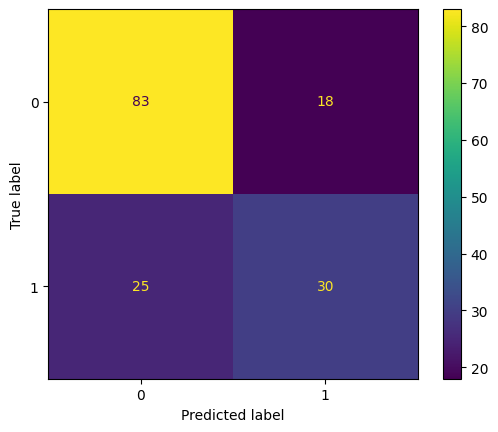

In [110]:
matrix = confusion_matrix(y_test, predictions)
display = ConfusionMatrixDisplay(matrix)
display.plot()
plt.show()

In [113]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 30), 'weights': ['uniform', 'distance']}

knn = KNeighborsClassifier()
best_knn = GridSearchCV(knn, param_grid, cv = 5)
best_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']})

In [114]:
model = KNeighborsClassifier(**best_knn.best_params_)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [144]:
print(f"Best model parameters: {model.get_params()}")
print(f"Best model accuracy score: {model.score(X_test, y_test)}")

Best model parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 21, 'p': 2, 'weights': 'uniform'}
Best model accuracy score: 0.8012820512820513


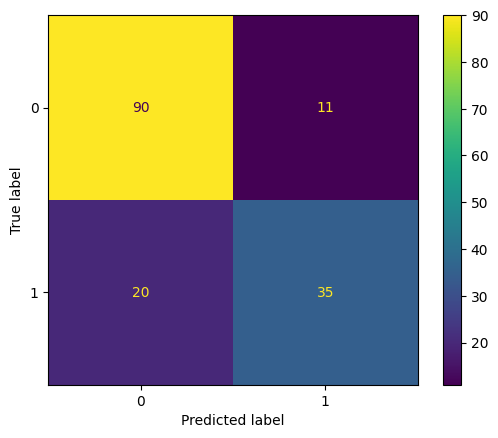

In [117]:
predictions = model.predict(X_test)
matrix = confusion_matrix(y_test, predictions)
display = ConfusionMatrixDisplay(matrix)
display.plot()
plt.show()

After doing a grid search, the best parameters for our model is 21 neighbors with uniform weights. This model produced a higher accuracy than the previous model, as seen in the confusion matrix above. Our model achieved about 80% accuracy on the testing data, which is pretty good. However, we can likely do even better using another type of model.

## SVM Classifier

We will now try a support vector machine (SVM) classifier to see if we can obtain better results.

In [158]:
from sklearn.svm import SVC

In [188]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [189]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [190]:
print(f"Score on training data: {svm.score(X_train, y_train)}")
print(f"Score on testing data: {svm.score(X_test, y_test)}")

Score on training data: 0.8022508038585209
Score on testing data: 0.8269230769230769


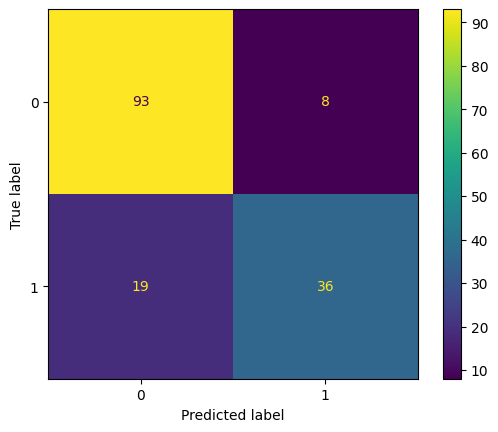

In [191]:
predictions = svm.predict(X_test)
matrix = confusion_matrix(y_test, predictions)
display = ConfusionMatrixDisplay(matrix)
display.plot()
plt.show()

## Conclusion

As you can see, the SVM model performs even better on the testing data than the KNN model. Our biggest concern is a Type II error: assuming that patients do not have diabetes, a Type II error occurs when we predict that someone does not have diabetes but they actually do (failing to reject the null hypothesis when it is false). For our SVM classification model, this occurs 19 out of 156 times, or about 12% of the time. While this is not ideal, it is certainly a good place to start with our data.

We can conduct further research to either find other measurable quantities that may be predictors of diabetes or collect more data using our current quantities to make a more accurate model to predict whether or not somebody has diabetes.

*Created for DSU Spring Curriculum 2023.*